## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query('landing_page == "new_page" & group == "control"').count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [7]:
df.query('landing_page == "old_page" & group == "treatment"').count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [29]:
df2 = df[((df['landing_page'] == "old_page") & (df['group'] == "control")) | ((df['landing_page'] == "new_page") & (df['group'] == "treatment"))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [30]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [31]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [32]:
names = df2.duplicated(['user_id']).value_counts()
names

False    290584
True          1
dtype: int64

c. What is the row information for the repeat **user_id**? 

In [40]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [43]:
df2 = df2.drop_duplicates(['user_id'], keep='last')
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted


In [45]:
df2.duplicated(['user_id']).value_counts()

False    290584
dtype: int64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [46]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [47]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [48]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [52]:
df2['landing_page'].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [57]:
len(df2.query('landing_page == "new_page"'))/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**
for now, there is an evidence that stated the conversion of the control group is higher than treatment group. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$$H_0: P_{new} <= P_{old} $$
$$H_1: P_{new} > P_{old} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [115]:
pn = df2.query('converted == 1')['user_id'].nunique()/df2.shape[0]
pn

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [116]:
po = df2.query('converted == 1')['user_id'].nunique()/df2.shape[0]
po

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [66]:
nn = df2.query('group == "treatment"').shape[0]
nn

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [67]:
no = df2.query('group == "control"').shape[0]
no

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [117]:
new_page_converted = np.random.choice([0, 1], size=nn, p=[pn, 1-pn])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [118]:
old_page_converted = np.random.choice([0, 1], size=no, p=[po, 1-po])
old_page_converted

array([1, 0, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [130]:
new_page_converted.mean() - old_page_converted.mean()

0.0014956125797580544

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [120]:
p_diffs = []
for _ in range(10000): 
    new_page_conv = np.random.choice([0, 1], size=nn, p=[pn, 1-pn])
    old_page_conv = np.random.choice([0, 1], size=no, p=[po, 1-po])
    p_diffs.append(new_page_conv.mean() - old_page_conv.mean())



i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  1.00000000e+00,   1.30000000e+01,   1.24000000e+02,
          7.28000000e+02,   2.23800000e+03,   3.30700000e+03,
          2.43000000e+03,   9.74000000e+02,   1.70000000e+02,
          1.50000000e+01]),
 array([-0.00583439, -0.00478547, -0.00373655, -0.00268762, -0.0016387 ,
        -0.00058978,  0.00045914,  0.00150807,  0.00255699,  0.00360591,
         0.00465483]),
 <a list of 10 Patch objects>)

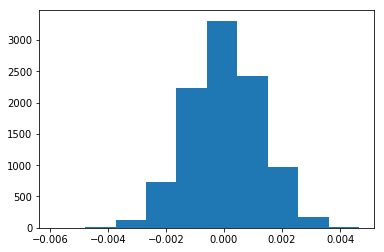

In [121]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [122]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

In [133]:
actual_conn = df2.query('converted == 1 & landing_page == "new_page"')['user_id'].nunique()/nn
actual_cono = df2.query('converted == 1 & landing_page == "old_page"')['user_id'].nunique()/no

In [135]:
obs_diff = actual_conn - actual_cono
obs_diff

-0.0015782389853555567

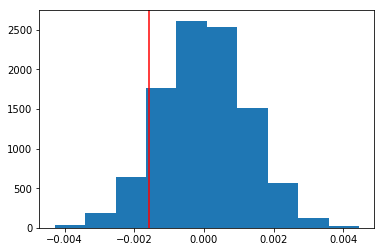

In [136]:
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [137]:
(null_vals > obs_diff).mean()

0.9002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
Since the p-value or the proportion of the p_diffs are bigger than 0.05 alpha, we have enought evidence in failing to reject the null hypothesis which means that the new page convert as many user as or less than old page. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [140]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 & landing_page == "old_page"')['user_id'].nunique()
convert_new = df2.query('converted == 1 & landing_page == "new_page"')['user_id'].nunique()
n_old = no
n_new = nn

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [141]:
sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
According to the Z-test value, in one-tail test with alpha as 0.05, we need a Z-test value exceeding -1.96 in order to reject null hypothesis. Since the Z-test value is -1.31, we fail to reject null hypothesis which is also proven by the p-value of 0.9 (bigger than 0.05). This finding is similar with the ones in part j. and k. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
We should use logistic regression since there is only two or binary outcomes for the dependent variables which is convertions. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [142]:
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [143]:
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [145]:
X = df2['ab_page']
Y = df2['converted']

X = sm.add_constant(X)

model = sm.Logit(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        19:04:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [146]:
print(print_model)

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        19:04:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**
The p-value of ab_page is 0.19 which means it fails to reject the null hypothesis of there is no differences between control and treatment group. In part II, the hypotheses revolved around the old and new landing page which is why it produced different p-value since the X variables are different in explaining the Y variable. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
We should tried to add more variables that have significant impact. Since we have tried both group and landing page seperately as insignificant, we might be able to add them together in one model or adding additional variables such as dummy variables of time. However, by adding more variables, the model might become more insignificant by adding variables that have no impact or its interpretation might be more difficult since there is more variables to be considered for their inclusion and effect reasons as well as the relationships between independent variables might be affecting each others (multicollinearity) 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [148]:
country = pd.read_csv('countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [157]:
dfjoin = df2.merge(country, on ='user_id', how='left')
dfjoin.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,US


In [158]:
dfjoin['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [160]:
dfjoin[['CA','UK','US']] = pd.get_dummies(dfjoin['country'])
dfjoin.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,country,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,US,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,US,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,US,1,0,0


In [162]:
X = dfjoin[['new_page', 'US', 'UK']]
Y = dfjoin['converted']

X = sm.add_constant(X)

model = sm.Logit(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 22 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        19:34:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.

In [163]:
np.exp(model.params)

const       0.131332
new_page    0.985168
US          1.041599
UK          1.051944
dtype: float64

In [165]:
1/np.exp(model.params)

const       7.614303
new_page    1.015056
US          0.960062
UK          0.950621
dtype: float64

We can see that in the above regression, dummy variables of countries and pages are not good predictor as they are not significant or fail to reject the null hypothesis (with p-value bigger than 0.05). 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [169]:
dfjoin['US_new'] = dfjoin['new_page']* dfjoin['US']
dfjoin['UK_new'] = dfjoin['new_page']* dfjoin['UK']
dfjoin.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,country,US,UK,CA,US_new,UK_new
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,US,1,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,US,1,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,1,0,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,1,0,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,US,1,0,0,0,0


In [170]:
X = dfjoin[['new_page', 'US', 'UK', 'US_new', 'UK_new']]
Y = dfjoin['converted']

X = sm.add_constant(X)

model = sm.Logit(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 22 Mar 2019   Pseudo R-squ.:               3.482e-05
Time:                        20:00:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page      -0.0674      0.

In [171]:
np.exp(model.params)

const       0.134794
new_page    0.934776
US          1.017682
UK          1.011854
US_new      1.048001
UK_new      1.081428
dtype: float64

In [172]:
1/np.exp(model.params)

const       7.418713
new_page    1.069775
US          0.982625
UK          0.988285
US_new      0.954198
UK_new      0.924703
dtype: float64

We can also see that after giving interaction between the new pages and country in form of new interaction variables (US_new and UK_new) are not significant enough to reject null hypothesis (with p-value bigger than 0.05). 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [173]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0